#  Quick Start (Multi-sample)

## Multi samples

Multi-sample data set consists of continuous or time-series samples. This quick start would help you learn about handling them rapidly.

## MSData construction

Please download the [example data](http://116.6.21.110:8090/share/3ca60300-e8bd-4d67-8b68-14267e428523) first. Here we use drosophila data for demo. Main input file formats are GEM/GEF (from Stereo-seq), H5ad (from Scanpy). Add your dataset as below:

In [2]:
import sys
import os
from natsort import natsorted
import stereo as st
from stereo.core.ms_data import MSData
from stereo.core.ms_pipeline import slice_generator

import warnings
warnings.filterwarnings('ignore')


# prepara for input directory
data_dir = './Demo_3D/3D_AnnData_0.8.0'

data_list=[]
for fn in os.listdir(data_dir):
    data_list.append(os.path.join(data_dir, fn))

# ensure data order by naming them regularly
data_list = natsorted(data_list)

# construct MSData object 
ms_data = MSData(_relationship='other', _var_type='intersect')

# when come to loaded data object 
# ms_data = MSData(_data_list=[data1, data2], _names=['s1', 's2'], _relationship='other', _var_type='intersect')

# add all samples into MSData
for sample in data_list:
    ms_data += st.io.read_h5ad(file_path=sample, bin_type='bins', bin_size=1)

After loading sorted data into MSData object, just type it to obtain basic information.

In [3]:
ms_data

ms_data: {'0': (482, 13668), '1': (549, 13668), '2': (598, 13668), '3': (713, 13668), '4': (744, 13668), '5': (815, 13668), '6': (925, 13668), '7': (1272, 13668), '8': (1263, 13668), '9': (1248, 13668), '10': (1039, 13668), '11': (1260, 13668), '12': (959, 13668), '13': (1078, 13668), '14': (1240, 13668), '15': (1110, 13668)}
num_slice: 16
names: ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15']
obs: []
var: []
relationship: other
var_type: intersect to 0
mss: []

Get one of samples like when you work with Python list.

In [4]:
ms_data[0]

AnnData object with n_obs × n_vars = 482 × 13668
    obs: 'slice_ID', 'raw_x', 'raw_y', 'new_x', 'new_y', 'new_z', 'annotation'
    uns: 'bin_type', 'bin_size', 'sn'
    obsm: 'X_umap', 'spatial', 'spatial_elas', 'spatial_rigid'
    layers: 'raw_counts'

<div class="alert alert-info">

**Note**

The analysis results, like quality control metrics, UMAP and ... , are just stayed in each sample data object, which are not associated with multiple samples. When it comes to the usage of each sample annotation result, a simple function, `ms_data.to_integrate()`, will be introduced later to meet your analysis needs.

</div>

The index of each sample is related to the order they were added, and names can be changes as below:

In [5]:
name_list=[]
for i in range(16):
    name_list.append('S'+ str(i))

# pass name list to MSData
ms_data.names=name_list
ms_data

ms_data: {'S0': (482, 13668), 'S1': (549, 13668), 'S2': (598, 13668), 'S3': (713, 13668), 'S4': (744, 13668), 'S5': (815, 13668), 'S6': (925, 13668), 'S7': (1272, 13668), 'S8': (1263, 13668), 'S9': (1248, 13668), 'S10': (1039, 13668), 'S11': (1260, 13668), 'S12': (959, 13668), 'S13': (1078, 13668), 'S14': (1240, 13668), 'S15': (1110, 13668)}
num_slice: 16
names: ['S0', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'S7', 'S8', 'S9', 'S10', 'S11', 'S12', 'S13', 'S14', 'S15']
obs: []
var: []
relationship: other
var_type: intersect to 0
mss: []

And sample names can be reset using `ms_data.reset_name()`.

In [6]:
ms_data.reset_name()
ms_data

ms_data: {'0': (482, 13668), '1': (549, 13668), '2': (598, 13668), '3': (713, 13668), '4': (744, 13668), '5': (815, 13668), '6': (925, 13668), '7': (1272, 13668), '8': (1263, 13668), '9': (1248, 13668), '10': (1039, 13668), '11': (1260, 13668), '12': (959, 13668), '13': (1078, 13668), '14': (1240, 13668), '15': (1110, 13668)}
num_slice: 16
names: ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15']
obs: []
var: []
relationship: other
var_type: intersect to 0
mss: []

The relationship means literally the correlation between/among multi samples, which is default to `other` and could be changed simply.

In [7]:
ms_data.relationship='continuous'

<div class="alert alert-info">

**Note**

`ms_data.integrate()` is necessarily to be performed after data loading. Default method is `intersect`, which means to take the intersection of genes (var) for subsequent multi-sample analysis. After integration, `_var_type` shows the intersect gene number from 0 to 13668. Otherwise here also provide `union` method.

</div>

In [8]:
ms_data.integrate()
ms_data

ms_data: {'0': (482, 13668), '1': (549, 13668), '2': (598, 13668), '3': (713, 13668), '4': (744, 13668), '5': (815, 13668), '6': (925, 13668), '7': (1272, 13668), '8': (1263, 13668), '9': (1248, 13668), '10': (1039, 13668), '11': (1260, 13668), '12': (959, 13668), '13': (1078, 13668), '14': (1240, 13668), '15': (1110, 13668)}
num_slice: 16
names: ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15']
obs: ['batch']
var: []
relationship: continuous
var_type: intersect to 13668
mss: []

## Preprocessing

### Quality control

`scope` and `mode` are crucial parameters in basic multi-sample analysis and correlated funcitons.

 - `scope` , similar to list, means which samples used for analysis.
 - `mode`, like a switch, shows that analysis is performed on single sample or multi samples, `integrate` and `isolated`. It is easy to distinguish processing modes.

There are two ways to set `scope` and `mode`, running `ms_data.tl.set_mode_and_scope` to set them globally or pass them as parameters into each analysis function, the latter will overwrite the former on every specific function.

In [ ]:
ms_data.tl.set_scope_and_mode(
    scope=slice_generator[:],
    mode='integrate'
)

In [9]:
ms_data.tl.cal_qc(scope=slice_generator[:],mode='integrate')
ms_data

[2023-07-10 22:31:34][Stereo][18436][MainThread][8820][ms_pipeline][106][INFO]: data_obj(idx=0) in ms_data start to run cal_qc
[2023-07-10 22:31:34][Stereo][18436][MainThread][8820][st_pipeline][37][INFO]: start to run cal_qc...
[2023-07-10 22:31:35][Stereo][18436][MainThread][8820][st_pipeline][40][INFO]: cal_qc end, consume time 0.0970s.


ms_data: {'0': (482, 13668), '1': (549, 13668), '2': (598, 13668), '3': (713, 13668), '4': (744, 13668), '5': (815, 13668), '6': (925, 13668), '7': (1272, 13668), '8': (1263, 13668), '9': (1248, 13668), '10': (1039, 13668), '11': (1260, 13668), '12': (959, 13668), '13': (1078, 13668), '14': (1240, 13668), '15': (1110, 13668)}
num_slice: 16
names: ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15']
obs: ['batch', 'total_counts', 'n_genes_by_counts', 'pct_counts_mt']
var: ['n_cells', 'n_counts', 'mean_umi']
relationship: continuous
var_type: intersect to 13668
mss: []

[2023-07-10 22:31:35][Stereo][18436][MainThread][8820][ms_pipeline][106][INFO]: data_obj(idx=0) in ms_data start to run violin


Column
    [0] Markdown(str)
    [1] Row
        [0] TextInput(name='file name', placeholder='Enter a file name...', width=200)
        [1] IntInput(name='dpi', placeholder='Enter the dip...', start=0, value=100, width=200)
    [2] Row
        [0] Button(button_type='primary', name='export', width=100)
        [1] StaticText(width=800)

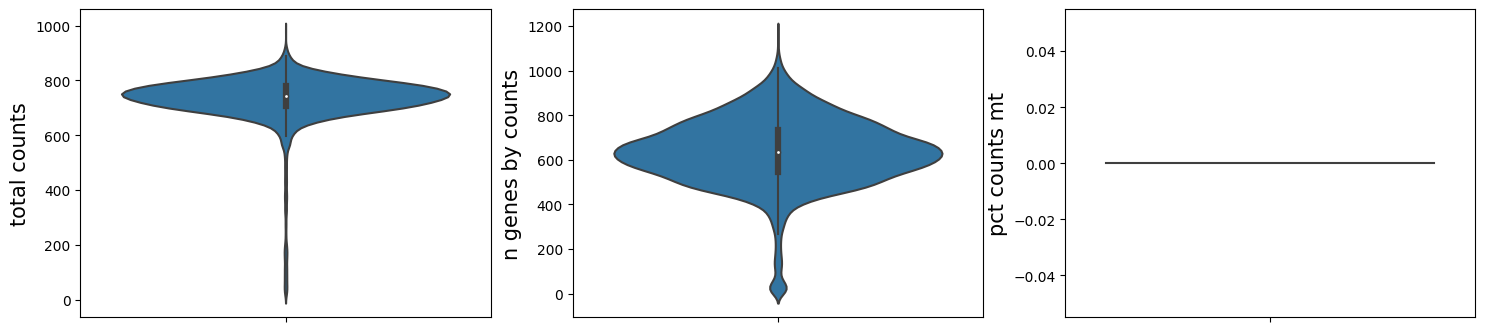

In [10]:
ms_data.plt.violin()

QC results of previous step are saved into MSData. When you want to calculate them on several certain samples, work as below:

In [11]:
ms_data.tl.cal_qc(scope=slice_generator[0:2],mode='isolated')

[2023-07-10 22:31:35][Stereo][18436][Thread-20][2712][ms_pipeline][138][INFO]: data_obj(idx=0) in ms_data start to run cal_qc
[2023-07-10 22:31:35][Stereo][18436][Thread-20][2712][st_pipeline][37][INFO]: start to run cal_qc...
[2023-07-10 22:31:35][Stereo][18436][Thread-21][21272][ms_pipeline][138][INFO]: data_obj(idx=1) in ms_data start to run cal_qc
[2023-07-10 22:31:35][Stereo][18436][Thread-21][21272][st_pipeline][37][INFO]: start to run cal_qc...
[2023-07-10 22:31:35][Stereo][18436][Thread-20][2712][st_pipeline][40][INFO]: cal_qc end, consume time 0.0750s.
[2023-07-10 22:31:35][Stereo][18436][Thread-21][21272][st_pipeline][40][INFO]: cal_qc end, consume time 0.0410s.


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    0.0s finished


Works run in parallel on each selected data object and the corresponding result is also updated into itself.

In [12]:
ms_data[0]

AnnData object with n_obs × n_vars = 482 × 13668
    obs: 'slice_ID', 'raw_x', 'raw_y', 'new_x', 'new_y', 'new_z', 'annotation', 'batch', 'total_counts', 'n_genes_by_counts', 'pct_counts_mt'
    var: 'n_cells', 'n_counts', 'mean_umi'
    uns: 'bin_type', 'bin_size', 'sn'
    obsm: 'X_umap', 'spatial', 'spatial_elas', 'spatial_rigid'
    layers: 'raw_counts'

Column
    [0] Markdown(str)
    [1] Row
        [0] TextInput(name='file name', placeholder='Enter a file name...', width=200)
        [1] IntInput(name='dpi', placeholder='Enter the dip...', start=0, value=100, width=200)
    [2] Row
        [0] Button(button_type='primary', name='export', width=100)
        [1] StaticText(width=800)

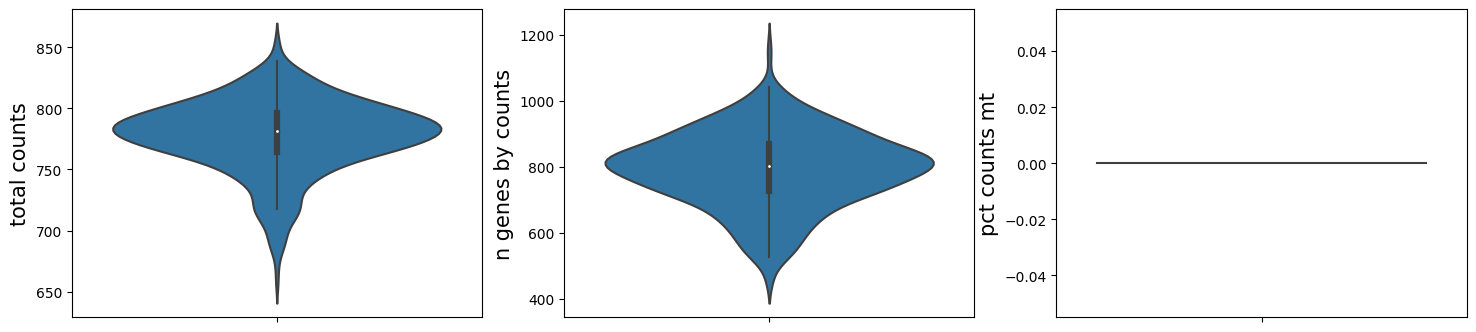

In [13]:
ms_data[0].plt.violin()

Show the spatial scatter figure of QC distribution. In multi-sample analysis, serveral parameters are added here for better visual presentation.

[2023-07-10 22:31:36][Stereo][18436][MainThread][8820][ms_pipeline][106][INFO]: data_obj(idx=0) in ms_data start to run spatial_scatter


Column
    [0] Markdown(str)
    [1] Row
        [0] TextInput(name='file name', placeholder='Enter a file name...', width=200)
        [1] IntInput(name='dpi', placeholder='Enter the dip...', start=0, value=100, width=200)
    [2] Row
        [0] Button(button_type='primary', name='export', width=100)
        [1] StaticText(width=800)

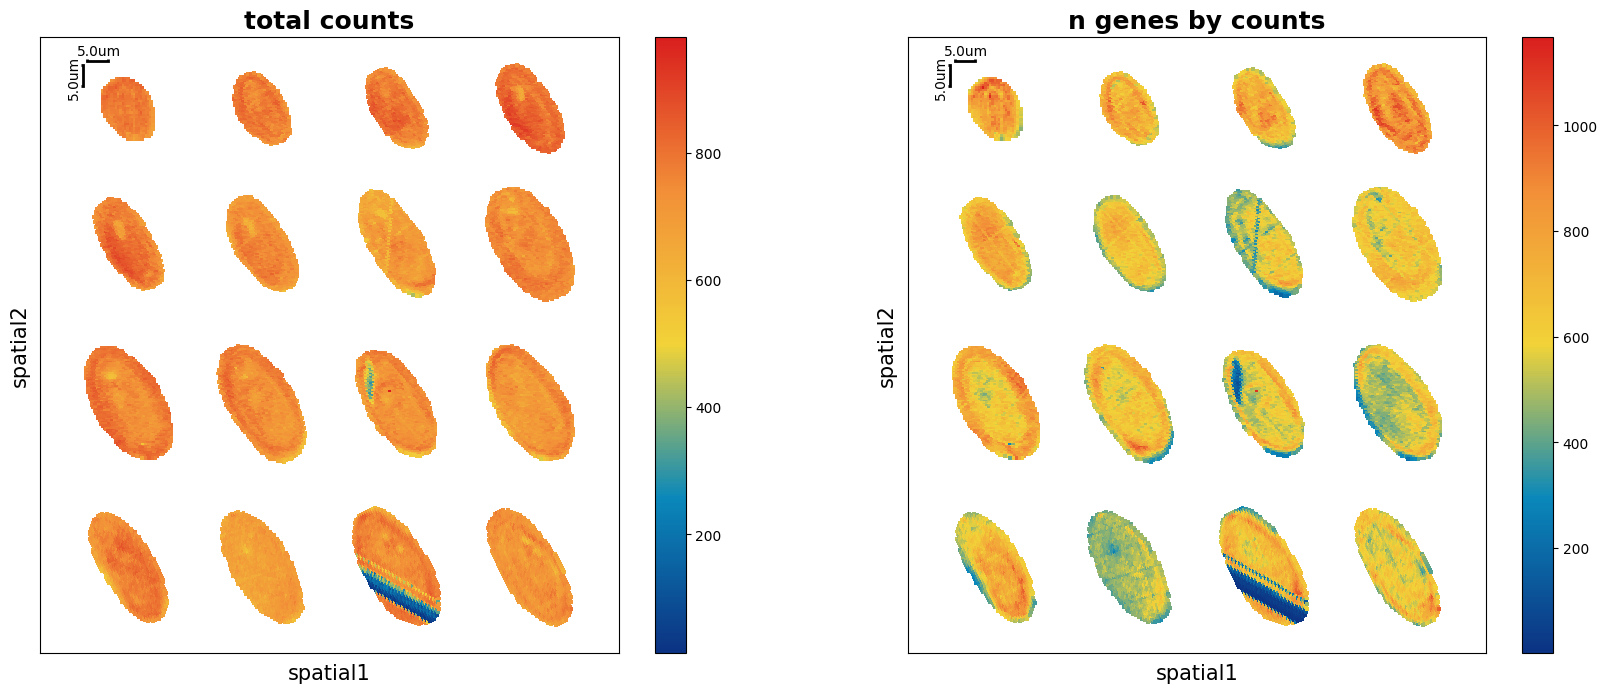

In [14]:
ms_data.plt.spatial_scatter(
            scope=slice_generator[:],
            mode='integrate',
            plotting_scale_width=10,          # the width of scale
            reorganize_coordinate=4,          # the number of plots in each row
            horizontal_offset_additional=20,  # adjustment for horizontal distance
            vertical_offset_additional=20     # adjustment for vertical distance
            )

### Filtering

Three basic methods are provided to filter data maxtrix:

- `data.tl.filter_cells`,
- `data.tl.filter_genes`,
- `data.tl.filter_coordinates`.

Literally, you could filter data on three optional levels: cell, gene and coordinate. Filter data based on quality control indicators which have been calculated in QC part.

<div class="alert alert-info">

**Note**

Demo datas used here are all elaborately processed beforehand, so that filtering and normalization will not performed in this tutorial.

</div>

In [15]:
# ms_data.tl.filter_cells(min_gene=20, min_n_genes_by_counts=3, pct_counts_mt=5, scope=slice_generator[:], mode='integrate', inplace=True)

We strongly suggest to use `self.raw` to record the raw gene expression matrix which has been gone through basic processing, as an essential data set for subsequent differential testing and multiple analysis. When you want to get raw data, just run `ms_data.tl.reset_raw_data()`.

In [16]:
ms_data.tl.raw_checkpoint()
ms_data.tl.raw

[2023-07-10 22:31:37][Stereo][18436][MainThread][8820][ms_pipeline][106][INFO]: data_obj(idx=0) in ms_data start to run raw_checkpoint


<function stereo.core.ms_pipeline.MSDataPipeLine.__getattr__.<locals>.temp(*args, **kwargs)>

### Normalization

In this module, you can choose from following common methods of standardization:

- [normalize_total](https://www.nature.com/articles/nbt.3192)
- [log1p](https://academic.oup.com/bioinformatics/article/37/15/2223/6155989)
- scale
- [scTransform](https://genomebiology.biomedcentral.com/articles/10.1186/s13059-019-1874-1)
- [quantile](https://github.com/panjie-payne/test-sphinx/blob/master/docs/source/_static/quantile.pdf)

<div class="alert alert-info">

**Note**

If the parameter `inplace` is set to `True` by default, expression matrix data will be replaced by the corresponding result (here replaced by the normalized result), otherwise unchanged.

</div>

Run a combination method of `normalize_total` and `log1p` to normalize gene expression matrix as below:

In [17]:
# ms_data.tl.normalize_total(target_sum=10000)
# ms_data.tl.log1p()

If you use `ms_data.tl.sctransform` which includes the function of finding highly variable genes, you do not need to run `ms_data.tl.highly_variable_genes`. In the subsequent `ms_data.tl.pca` method, the parameter `use_highly_genes` has to be set as `False`. In brief, whether to use highly variable genes to run PCA depends on `filter_hvgs` in the normalization of scTransform. Learn more about [scTransform](https://github.com/STOmics/stereopy/blob/main/docs/source/Tutorials/sctransform.ipynb).

### Highly variable genes

Identify highly variable genes in cells.

In [18]:
ms_data.tl.highly_variable_genes(
        min_mean=0.0125,
        max_mean=3,
        min_disp=0.5,
        n_top_genes=2000, 
        res_key='highly_variable_genes',
        scope=slice_generator[:],
        mode='integrate'
        ) 

[2023-07-10 22:31:37][Stereo][18436][MainThread][8820][ms_pipeline][106][INFO]: data_obj(idx=0) in ms_data start to run highly_variable_genes
[2023-07-10 22:31:37][Stereo][18436][MainThread][8820][st_pipeline][37][INFO]: start to run highly_variable_genes...
[2023-07-10 22:31:38][Stereo][18436][MainThread][8820][st_pipeline][40][INFO]: highly_variable_genes end, consume time 0.4050s.


[2023-07-10 22:31:38][Stereo][18436][MainThread][8820][ms_pipeline][106][INFO]: data_obj(idx=0) in ms_data start to run highly_variable_genes


Column
    [0] Markdown(str)
    [1] Row
        [0] TextInput(name='file name', placeholder='Enter a file name...', width=200)
        [1] IntInput(name='dpi', placeholder='Enter the dip...', start=0, value=100, width=200)
    [2] Row
        [0] Button(button_type='primary', name='export', width=100)
        [1] StaticText(width=800)

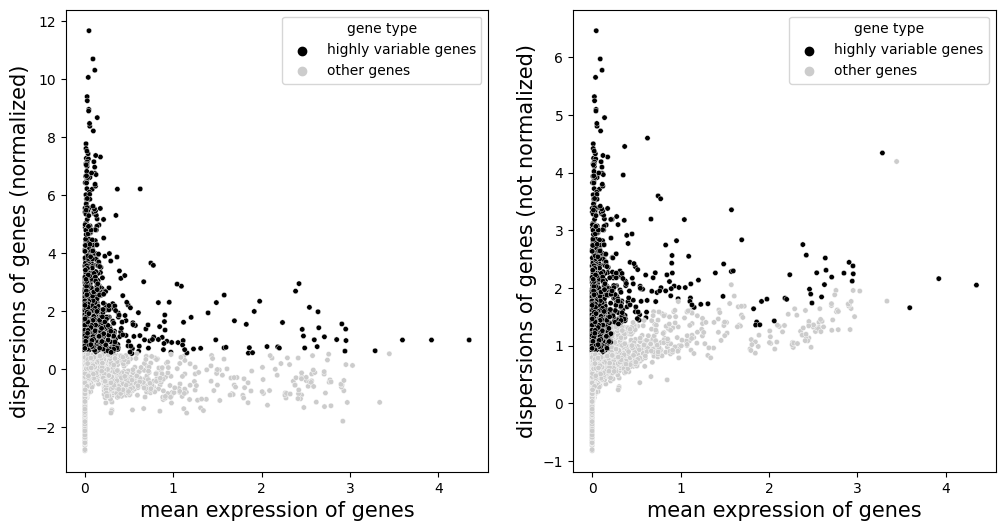

In [19]:
# remember to choose a res_key when plot
ms_data.plt.highly_variable_genes(res_key='highly_variable_genes')

Scale each gene to unit variance. Clip values exceeding standard deviation 10. If `data.tl.scale(zero_center=False)` is used, sparse matrix will be used for calculation, which can greatly reduce the memory required for running.

In [20]:
# ms_data.tl.scale(max_value=10, zero_center=True)

## Embedding

### PCA (Principal component analysis)

As a statistical technique for reducing dimensionality of a data set, PCA finds the max axes of greatest variation, which preserve as much information as possible. Notice that if set parameter `use_highly_genes` to `True`, only highly variable genes are used to run.

In [21]:
ms_data.tl.pca(
        use_highly_genes=False, 
        n_pcs=30, 
        res_key='pca',
        scope=slice_generator[:],
        mode='integrate'
        )

[2023-07-10 22:31:39][Stereo][18436][MainThread][8820][ms_pipeline][106][INFO]: data_obj(idx=0) in ms_data start to run pca
[2023-07-10 22:31:39][Stereo][18436][MainThread][8820][st_pipeline][37][INFO]: start to run pca...
[2023-07-10 22:31:39][Stereo][18436][MainThread][8820][dim_reduce][77][WARNING]: svd_solver: auto can not be used with sparse input.
Use "arpack" (the default) instead.
[2023-07-10 22:31:44][Stereo][18436][MainThread][8820][st_pipeline][40][INFO]: pca end, consume time 5.0780s.


In [22]:
ms_data

ms_data: {'0': (482, 13668), '1': (549, 13668), '2': (598, 13668), '3': (713, 13668), '4': (744, 13668), '5': (815, 13668), '6': (925, 13668), '7': (1272, 13668), '8': (1263, 13668), '9': (1248, 13668), '10': (1039, 13668), '11': (1260, 13668), '12': (959, 13668), '13': (1078, 13668), '14': (1240, 13668), '15': (1110, 13668)}
num_slice: 16
names: ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15']
obs: ['batch', 'total_counts', 'n_genes_by_counts', 'pct_counts_mt']
var: ['n_cells', 'n_counts', 'mean_umi', 'hvgs']
relationship: continuous
var_type: intersect to 13668
mss: ["scope_[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]:['highly_variable_genes', 'pca']"]

### Neighborhood graph 

After PCA, we compute the neighborhood graph of cells using the PCA representation of the expression matrix.

In [23]:
ms_data.tl.neighbors(
        pca_res_key='pca', 
        n_pcs=30, 
        res_key='neighbors',
        scope=slice_generator[:],
        mode='integrate'
        )

# compute spatial neighbors 
# ms_data.tl.spatial_neighbors(
#        neighbors_res_key='neighbors',
#        res_key='spatial_neighbors',
#        scope=slice_generator[:],
#        mode='integrate'
#        )

[2023-07-10 22:31:44][Stereo][18436][MainThread][8820][ms_pipeline][106][INFO]: data_obj(idx=0) in ms_data start to run neighbors
[2023-07-10 22:31:44][Stereo][18436][MainThread][8820][st_pipeline][37][INFO]: start to run neighbors...
[2023-07-10 22:32:14][Stereo][18436][MainThread][8820][st_pipeline][40][INFO]: neighbors end, consume time 30.4820s.


In addition, we also provide `ms_data.tl.spatial_neighbors` to compute a spatial neighbors graph.

### UMAP 

It's strongly to suggest embedding the graph in two dimensions using UMAP.

In [24]:
ms_data.tl.umap(
            pca_res_key='pca', 
            neighbors_res_key='neighbors', 
            res_key='umap',
            scope=slice_generator[:],
            mode='integrate'
            )

[2023-07-10 22:32:14][Stereo][18436][MainThread][8820][ms_pipeline][106][INFO]: data_obj(idx=0) in ms_data start to run umap
[2023-07-10 22:32:14][Stereo][18436][MainThread][8820][st_pipeline][37][INFO]: start to run umap...


	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs


[2023-07-10 22:32:26][Stereo][18436][MainThread][8820][st_pipeline][40][INFO]: umap end, consume time 11.4150s.


## Clustering

Currently we provide three common clustering methods, including **Leiden**, **Louvain** and **Phenograph**.

In this tool, you can re-run the normalization method before clustering if the parameter `normalize_method`  is not None. Then by default, we perform PCA to reduce the dimensionalites of the new normalization result, and use top 30 pcs to run clustering. 

### Leiden 

Simply run:

In [25]:
ms_data.tl.leiden(
            neighbors_res_key='neighbors', 
            res_key='leiden',
            scope=slice_generator[:],
            mode='integrate'
            )

[2023-07-10 22:32:26][Stereo][18436][MainThread][8820][ms_pipeline][106][INFO]: data_obj(idx=0) in ms_data start to run leiden
[2023-07-10 22:32:26][Stereo][18436][MainThread][8820][st_pipeline][37][INFO]: start to run leiden...
[2023-07-10 22:32:29][Stereo][18436][MainThread][8820][st_pipeline][40][INFO]: leiden end, consume time 2.8971s.


Show the spatial distribution of UMAP and Leiden clustering.

[2023-07-10 22:32:29][Stereo][18436][MainThread][8820][ms_pipeline][106][INFO]: data_obj(idx=0) in ms_data start to run umap


Column
    [0] Markdown(str)
    [1] Row
        [0] TextInput(name='file name', placeholder='Enter a file name...', width=200)
        [1] IntInput(name='dpi', placeholder='Enter the dip...', start=0, value=100, width=200)
    [2] Row
        [0] Button(button_type='primary', name='export', width=100)
        [1] StaticText(width=800)

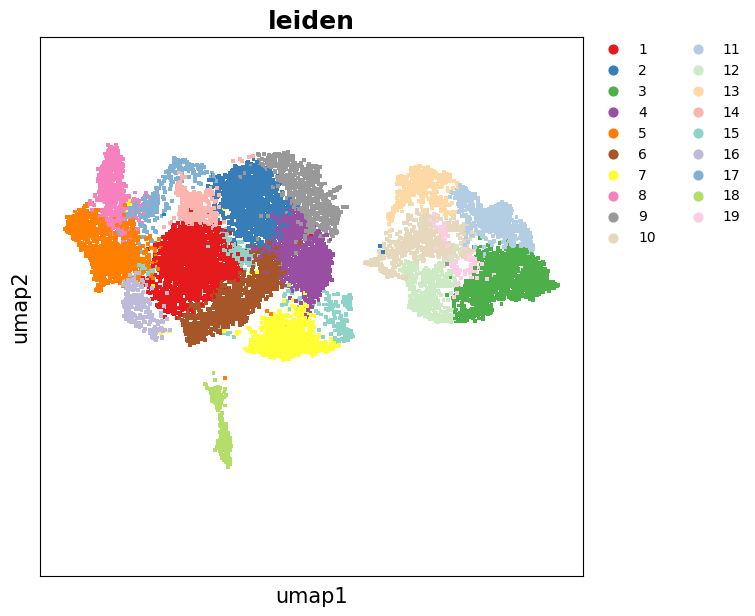

In [26]:
ms_data.plt.umap(
            cluster_key='leiden',
            res_key='umap',
            scope=slice_generator[:],
            mode='integrate'
            )

[2023-07-10 22:32:30][Stereo][18436][MainThread][8820][ms_pipeline][106][INFO]: data_obj(idx=0) in ms_data start to run cluster_scatter


Column
    [0] Markdown(str)
    [1] Row
        [0] TextInput(name='file name', placeholder='Enter a file name...', width=200)
        [1] IntInput(name='dpi', placeholder='Enter the dip...', start=0, value=100, width=200)
    [2] Row
        [0] Button(button_type='primary', name='export', width=100)
        [1] StaticText(width=800)

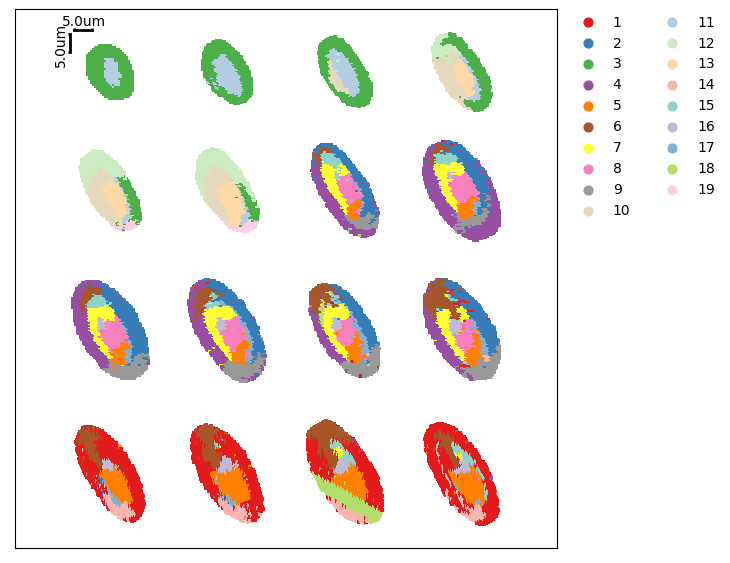

In [27]:
ms_data.plt.cluster_scatter(
            res_key='leiden',
            scope=slice_generator[:],
            mode='integrate',
            plotting_scale_width=10,          # the width of scale
            reorganize_coordinate=4,          # the number of plots in each row
            horizontal_offset_additional=20,  # adjustment for horizontal distance
            vertical_offset_additional=20     # adjustment for vertical distance
            )   

## Subset of samples

When it comes to analysis the subset of MSData, a simple case is shown below, using only the first four pieces ([0:4]) of data.

[2023-07-10 22:32:30][Stereo][18436][MainThread][8820][ms_pipeline][106][INFO]: data_obj(idx=0) in ms_data start to run highly_variable_genes
[2023-07-10 22:32:30][Stereo][18436][MainThread][8820][st_pipeline][37][INFO]: start to run highly_variable_genes...
[2023-07-10 22:32:31][Stereo][18436][MainThread][8820][st_pipeline][40][INFO]: highly_variable_genes end, consume time 0.2230s.
[2023-07-10 22:32:31][Stereo][18436][MainThread][8820][ms_pipeline][106][INFO]: data_obj(idx=0) in ms_data start to run pca
[2023-07-10 22:32:31][Stereo][18436][MainThread][8820][st_pipeline][37][INFO]: start to run pca...
[2023-07-10 22:32:31][Stereo][18436][MainThread][8820][dim_reduce][77][WARNING]: svd_solver: auto can not be used with sparse input.
Use "arpack" (the default) instead.
[2023-07-10 22:32:33][Stereo][18436][MainThread][8820][st_pipeline][40][INFO]: pca end, consume time 2.3720s.
[2023-07-10 22:32:33][Stereo][18436][MainThread][8820][ms_pipeline][106][INFO]: data_obj(idx=0) in ms_data star

	completed  0  /  500 epochs
	completed  50  /  500 epochs
	completed  100  /  500 epochs
	completed  150  /  500 epochs
	completed  200  /  500 epochs
	completed  250  /  500 epochs
	completed  300  /  500 epochs
	completed  350  /  500 epochs
	completed  400  /  500 epochs
	completed  450  /  500 epochs


[2023-07-10 22:32:42][Stereo][18436][MainThread][8820][st_pipeline][40][INFO]: umap end, consume time 6.5130s.
[2023-07-10 22:32:42][Stereo][18436][MainThread][8820][ms_pipeline][106][INFO]: data_obj(idx=0) in ms_data start to run leiden
[2023-07-10 22:32:42][Stereo][18436][MainThread][8820][st_pipeline][37][INFO]: start to run leiden...
[2023-07-10 22:32:42][Stereo][18436][MainThread][8820][pipeline_utils][18][WARNING]: 
            The function cell_cluster_to_gene_exp_cluster must be based on raw data.
            Please run data.tl.raw_checkpoint() before Normalization.
            
[2023-07-10 22:32:42][Stereo][18436][MainThread][8820][st_pipeline][40][INFO]: leiden end, consume time 0.1910s.
[2023-07-10 22:32:43][Stereo][18436][MainThread][8820][ms_pipeline][106][INFO]: data_obj(idx=0) in ms_data start to run cluster_scatter


Column
    [0] Markdown(str)
    [1] Row
        [0] TextInput(name='file name', placeholder='Enter a file name...', width=200)
        [1] IntInput(name='dpi', placeholder='Enter the dip...', start=0, value=100, width=200)
    [2] Row
        [0] Button(button_type='primary', name='export', width=100)
        [1] StaticText(width=800)

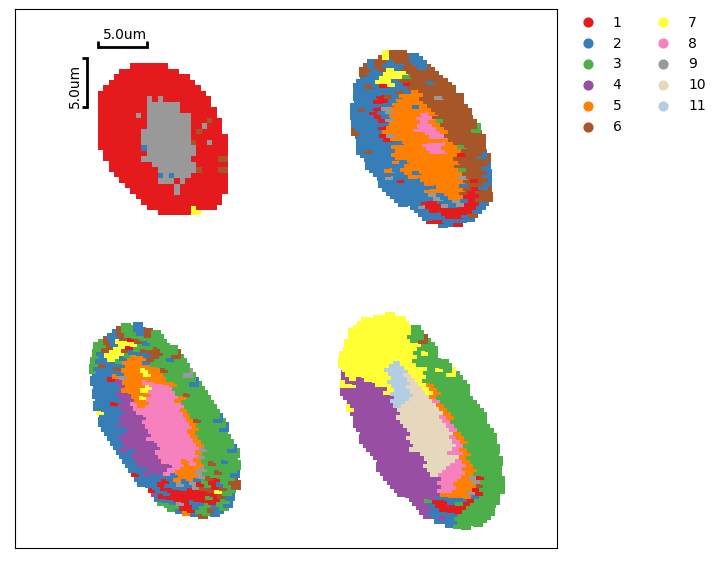

In [28]:
# hvg
ms_data.tl.highly_variable_genes(
        min_mean=0.0125,
        max_mean=3,
        min_disp=0.5,
        n_top_genes=2000, 
        res_key='highly_variable_genes_0123',
        scope=slice_generator[:4],
        mode='integrate'
        ) 
# pca 
ms_data.tl.pca(
        use_highly_genes=False, 
        n_pcs=30, 
        res_key='pca_0123',
        scope=slice_generator[:4],
        mode='integrate'
        )

# neighbors
ms_data.tl.neighbors(
        pca_res_key='pca_0123', 
        n_pcs=30, 
        res_key='neighbors_0123',
        scope=slice_generator[:4],
        mode='integrate'
        )

# umap 
ms_data.tl.umap(
            pca_res_key='pca_0123', 
            neighbors_res_key='neighbors_0123', 
            res_key='umap_0123',
            scope=slice_generator[:4],
            mode='integrate'
            )

# leiden
ms_data.tl.leiden(
            neighbors_res_key='neighbors_0123', 
            res_key='leiden_0123',
            scope=slice_generator[:4],
            mode='integrate'
            )

# clustering plot
ms_data.plt.cluster_scatter(
            res_key='leiden_0123',
            scope=slice_generator[:4],
            mode='integrate',
            plotting_scale_width=10,          # the width of scale
            reorganize_coordinate=2,          # the number of plots in each row
            horizontal_offset_additional=20,  # adjustment for horizontal distance
            vertical_offset_additional=20     # adjustment for vertical distance
            )

## Output file

Save your data into a HDF5 file, including metadata of each sample object and MSData. You could get it back using `st.io.read_h5ms()`.

In [29]:
st.io.write_h5ms(ms_data,output='./test.h5ms')

## To integrate

When dataset has been annotated indiviually in `isolated` mode, you could pass cell type prediction from single sample to multi-sample for subsequenty analysis.

In [30]:
ms_data[0]

AnnData object with n_obs × n_vars = 482 × 13668
    obs: 'slice_ID', 'raw_x', 'raw_y', 'new_x', 'new_y', 'new_z', 'annotation', 'batch', 'total_counts', 'n_genes_by_counts', 'pct_counts_mt'
    var: 'n_cells', 'n_counts', 'mean_umi'
    uns: 'bin_type', 'bin_size', 'sn'
    obsm: 'X_umap', 'spatial', 'spatial_elas', 'spatial_rigid'
    layers: 'raw_counts'

In [31]:
ms_data[1]

AnnData object with n_obs × n_vars = 549 × 13668
    obs: 'slice_ID', 'raw_x', 'raw_y', 'new_x', 'new_y', 'new_z', 'annotation', 'batch', 'total_counts', 'n_genes_by_counts', 'pct_counts_mt'
    var: 'n_cells', 'n_counts', 'mean_umi'
    uns: 'bin_type', 'bin_size', 'sn'
    obsm: 'X_umap', 'spatial', 'spatial_elas', 'spatial_rigid'
    layers: 'raw_counts'

Obstain `annotation` information in `obs` from each slice, and pass them to MSData with on `scope[0,1]` with new names `id`. Note that `NaN` will be used to fill the rest of `id` column by default.

In [32]:
ms_data.to_integrate(scope=slice_generator[0:2],res_key='id',_from=slice_generator[0:2],type='obs',item=['annotation','annotation'])

Check the annotation passed to MSData.

In [34]:
ms_data.obs

,id,batch,total_counts,n_genes_by_counts,pct_counts_mt
E14-16h_a_S01_20500x62780-0-0,CNS,0,723.957825,550,0.0
E14-16h_a_S01_20500x62800-0-0,CNS,0,722.087219,573,0.0
E14-16h_a_S01_20500x62820-0-0,epidermis,0,768.790100,666,0.0
E14-16h_a_S01_20500x62840-0-0,CNS,0,806.373718,794,0.0
E14-16h_a_S01_20500x62860-0-0,CNS,0,818.378723,815,0.0
...,...,...,...,...,...
E14-16h_a_S16_61760x79320-15-15,NaN,15,658.930420,423,0.0
E14-16h_a_S16_61760x79340-15-15,NaN,15,643.020813,410,0.0
E14-16h_a_S16_61760x79360-15-15,NaN,15,643.981323,411,0.0
E14-16h_a_S16_61760x79380-15-15,NaN,15,613.082153,379,0.0
